In [1]:
%tensorflow_version  2.x
import tensorflow as tf
import numpy as np
tf.__version__
import pandas as pd
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

TensorFlow 2.x selected.


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_bank = pd.read_csv('drive/My Drive/Residency7/bank.csv')

In [4]:
print("Shape: ",df_bank.shape)
df_bank.head()


Shape:  (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# check missing values..
df_bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# numbers of unique users
print("Unique RowNumber: ", len(df_bank.RowNumber.unique()))

# numbers of unique products
print("Unique CustomerId ", len(df_bank.CustomerId.unique()))

# numbers of unique products
print("Unique Surname ", len(df_bank.Surname.unique()))

Unique RowNumber:  10000
Unique CustomerId  10000
Unique Surname  2932


Observation

Following attributes have unique values close to the dataset count and hence can be dropped for anlysis: "RowNumber", "CustomerId", "Surname"
**2. Drop the columns which are unique for all users like IDs (2.5 points)**

In [0]:
drop_attrs = ["RowNumber", "CustomerId", "Surname"]
df_bank.drop(labels=drop_attrs,axis=1,inplace=True)

In [9]:
print("Shape: ",df_bank.shape)
df_bank.head()

Shape:  (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
numerical_cols = ["CreditScore", "Balance", "EstimatedSalary"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94fa488748>,
      dtype=object)

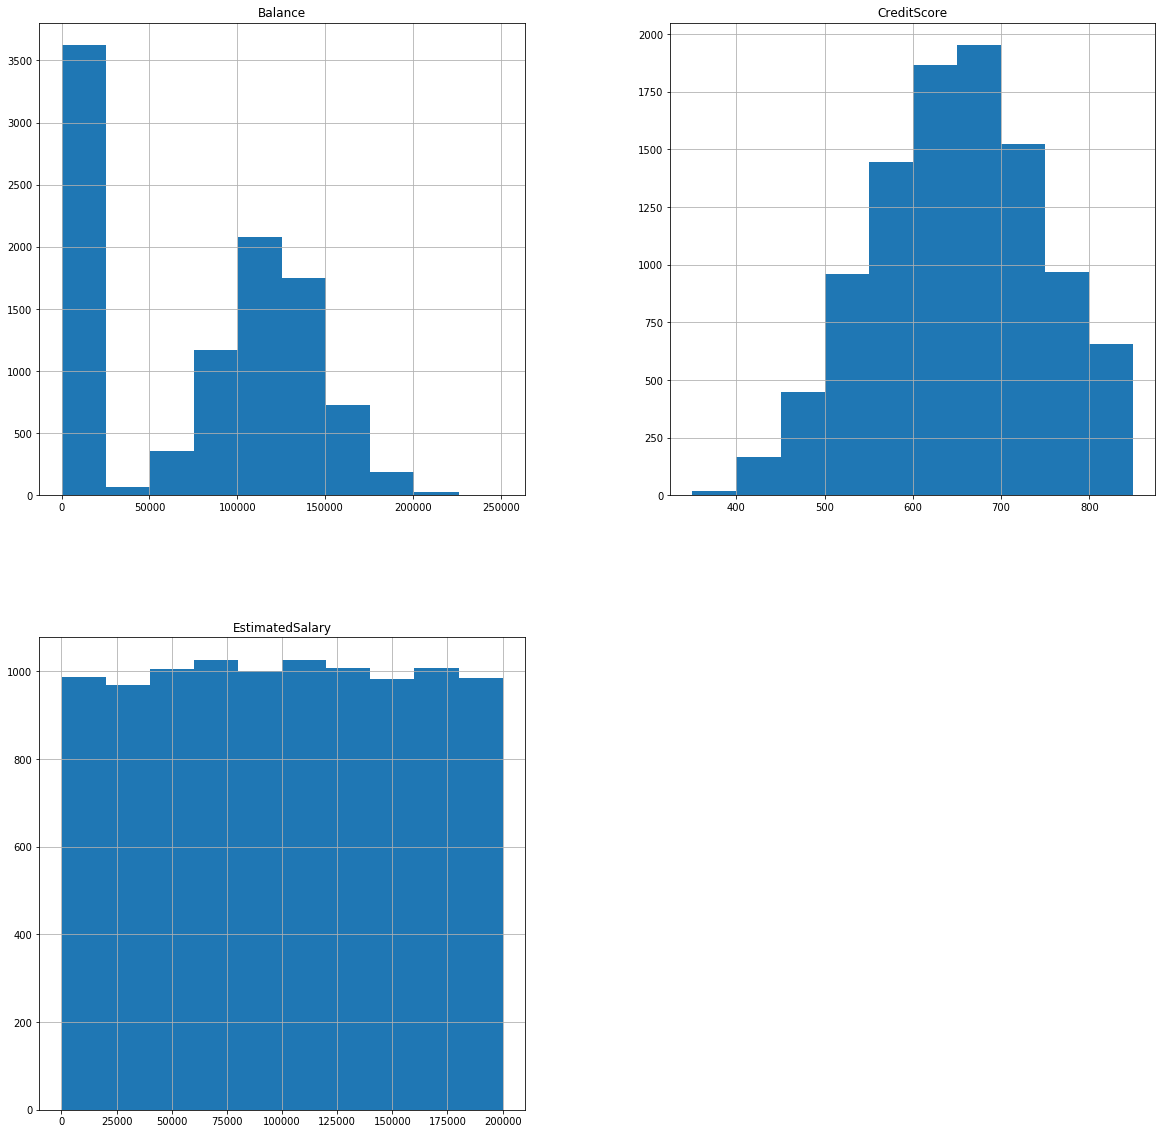

In [11]:
# perform univariant analysis by generating histogram of all dimensions
df_bank[numerical_cols].hist(figsize = [20,20])

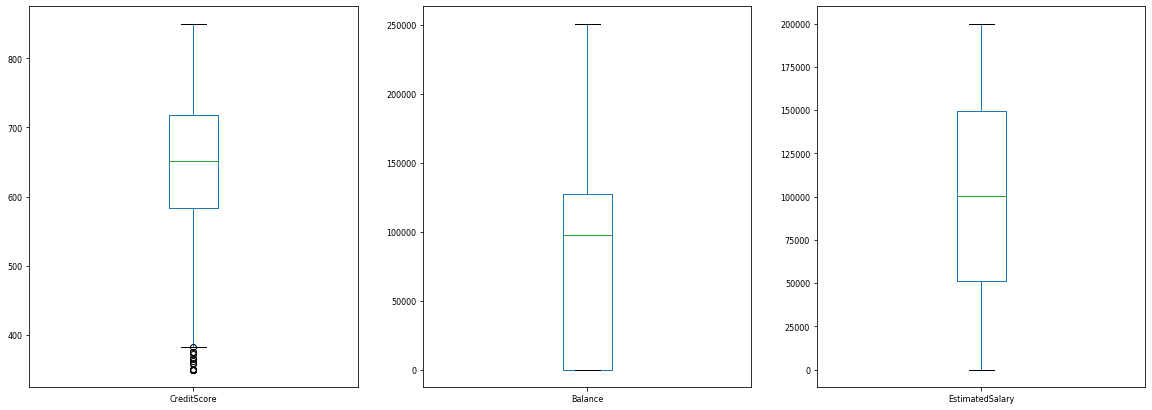

In [12]:
df_bank[numerical_cols].plot(kind='box', subplots=True, layout=(1,3), fontsize=8, figsize=(20,7))
plt.show()

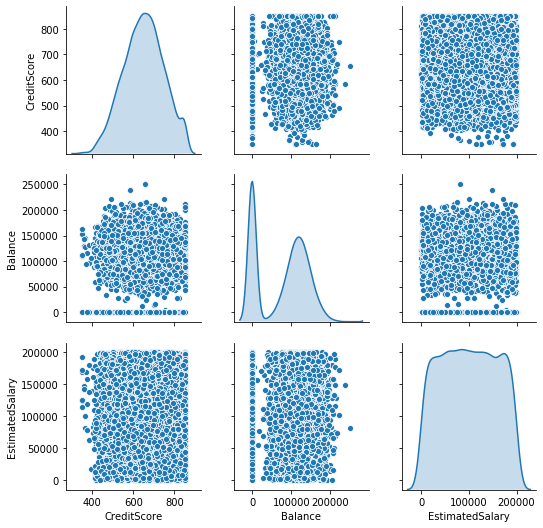

In [13]:
# bivariable analysis
sns.pairplot(df_bank[numerical_cols], diag_kind="kde")

In [14]:
# % of dateset having Balance as zero
bal_zero = len(df_bank[df_bank["Balance"]==0])/df_bank.shape[0]
print("% of dataset having zero balance: ", bal_zero)

% of dataset having zero balance:  0.3617


In [0]:

# Analysing independent variable correlation with each other and target variable
corr_matrix = df_bank.corr()

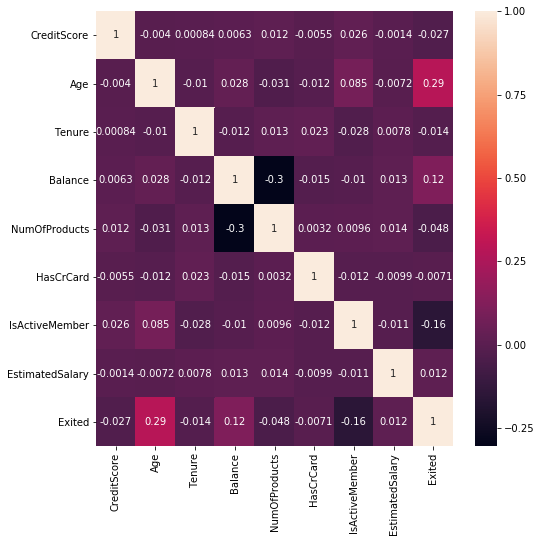

In [16]:
plt.subplots(figsize = (8,8))
sns.heatmap(corr_matrix, annot=True)

Data Preprocessing based on above findings
Convert categorical text into categorical numbers

Attributes: "Geography", "Gender"

EDA : Findings Dropped Attributes

Following attributes are uniques to the users and dropped from analysis: "RowNumber", "CustomerId", "Surname" Observation on categorical attributes "Geography", "Gender", "Tenure","NumOfProducts", "HasCrCard", "IsActiveMember"

NumOfProducts: there are 4 unique values(1,2,3,4_. value of 3,4 contibutes only 2.6 % and 0.6% "Geography", "Gender": are non-numeric data categorical attribute and hence required label encoding Observations on continuous attributes ("CreditScore", "Balance", "EstimatedSalary")

"Balance" attributes: approx 36% of dataset contains values of zero. two gausian curve are observed which might indicates two data sources or existing of clusters "CreditScore" attribute: outliers exist in lower side. Scaling is required as all three attribuets have different ranges

In [0]:
# converts categorical text into categorical numbers.
labelencoder = LabelEncoder()
df_bank['Geography'] = labelencoder.fit_transform(df_bank['Geography'])
df_bank['Gender'] = labelencoder.fit_transform(df_bank['Gender'])

In [0]:
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Analysing how one variable related to other and target variable**



In [0]:

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null int64
Gender             10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


Looking at the features we can see that row number, name will have no relation with a customer with leaving the bank.

In [0]:
# function to replace upper outlier with their max value of (Q3 + 1.5 * IRQ)
def treat_upper_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df[colname] = df[colname].apply(lambda x: ub if x > ub else x)
    
# function to replace lower outlier with their min value of (Q1 - 1.5 * IRQ)
def treat_lower_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    lb = np.quantile(a=data,q=0.25) - 1.5 * irq
    df[colname] = df[colname].apply(lambda x: lb if x < lb else x)

In [0]:
df_bank_treated = df_bank.copy(deep = True)  # make copy of orignal dataframe

# outlier treatment for "CreditScore"
treat_lower_outliers(df_bank_treated, "CreditScore")

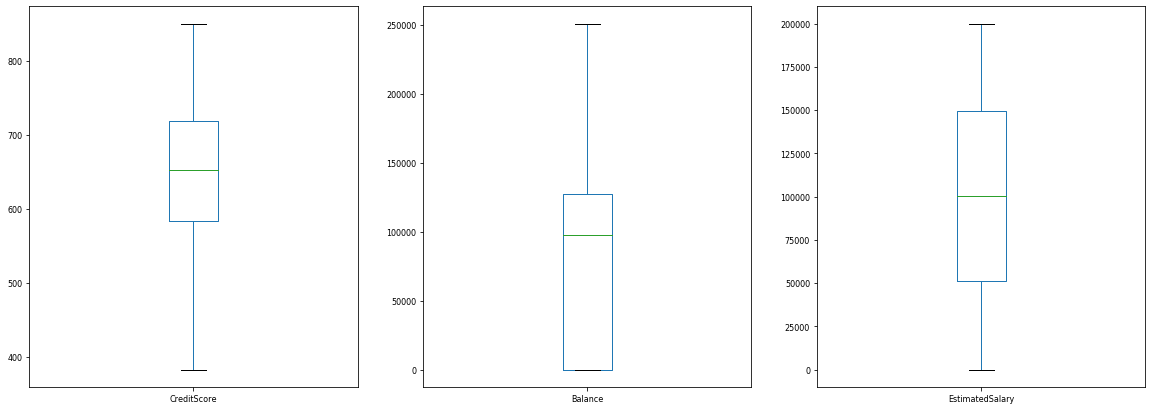

In [0]:

df_bank_treated[numerical_cols].plot(kind='box', subplots=True, layout=(1,3), fontsize=8, figsize=(20,7))
plt.show()

In [0]:
category_attrs=["Geography", "Gender", "Tenure","NumOfProducts", "HasCrCard", "IsActiveMember"]

df_bank_treated = pd.get_dummies(df_bank_treated, columns=category_attrs)

In [0]:
print("Shape: ", df_bank_treated.shape)
df_bank_treated.head()

Shape:  (10000, 29)


,CreditScore,Age,Balance,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619.0,42,0.00,101348.88,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,608.0,41,83807.86,112542.58,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,502.0,42,159660.80,113931.57,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,699.0,39,0.00,93826.63,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,850.0,43,125510.82,79084.10,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


**3. Distinguish the feature and target set (2.5 points)**

In [0]:
df_target = df_bank[["Exited"]]
df_features = df_bank.drop(labels="Exited",axis=1)

**NOTE:**
df_bank: dataset without outlier handing and withotu one-hot coding

df_bank_treated: dataset with outlier handing and one-hot coding bold text bold text

In [0]:
df_features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


**4. Divide the data set into Train and test sets**


In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, test_size=test_size, random_state=seed)

In [0]:
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)

X_train:  (7000, 10)
Y_train:  (7000, 1)


In [0]:
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

X_test:  (3000, 10)
Y_test:  (3000, 1)


**5. Normalize the train and test data (2.5 points)**

In [0]:
# Normalized variables: 
# Transform (centralize) the entire (independent variable data) to zscores through transformation.
std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.fit_transform(X_test)

**6. Initialize & build the model (10 points)**

In [0]:
# input size
print("Input Dimension: %d" %(X_train_std.shape[1]))

Input Dimension: 10


In [0]:
# Output size
print("Output Dimension: %d" %(Y_train.shape[1]))

Output Dimension: 1


In [0]:
model1 = tf.keras.models.Sequential()

#input_dim is required for the first hidden layer, as it is the first starting point. --> number of inputs.
model1.add(tf.keras.layers.BatchNormalization(input_shape=(X_train_std.shape[1],)))

# Output Layer
# output_dim should be 1, as output is binary outcome, and activation should be 'sigmoid'
# Keras declares weights and bias automatically
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
#compile the model --> backpropagation -> gradient descent
#optimizer = algorithm to find the optimal set of weights in ANN
#loss = functions that should be optimized.
#metrics = criterion used to calculate the performance of the model.
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#batch_size = the number of observations after which you want to update the weights
#           batch size and epochs should be tuned through experiments.
#epoch = going through the whole dataset
model1.fit(X_train_std, Y_train, 
          validation_data=(X_test_std, Y_test), 
          epochs=30,
          batch_size=10)

Train on 7000 samples, validate on 3000 samples
Epoch 1/30
7000/7000 [==============================] - 2s 223us/sample - loss: 0.6173 - accuracy: 0.7013 - val_loss: 0.4883 - val_accuracy: 0.7933
Epoch 2/30
7000/7000 [==============================] - 1s 166us/sample - loss: 0.4672 - accuracy: 0.8006 - val_loss: 0.4478 - val_accuracy: 0.7977
Epoch 3/30
7000/7000 [==============================] - 1s 170us/sample - loss: 0.4480 - accuracy: 0.7993 - val_loss: 0.4370 - val_accuracy: 0.8037
Epoch 4/30
7000/7000 [==============================] - 1s 171us/sample - loss: 0.4430 - accuracy: 0.8043 - val_loss: 0.4355 - val_accuracy: 0.8090
Epoch 5/30
7000/7000 [==============================] - 1s 163us/sample - loss: 0.4431 - accuracy: 0.8057 - val_loss: 0.4347 - val_accuracy: 0.8090
Epoch 6/30
7000/7000 [==============================] - 1s 171us/sample - loss: 0.4382 - accuracy: 0.8090 - val_loss: 0.4332 - val_accuracy: 0.8093
Epoch 7/30
7000/7000 [==============================] - 1s 171us

In [0]:
test_loss1, test_acc1 = model1.evaluate(X_test_std, Y_test)
print('\nTest accuracy:[Without any middle layer]: %0.2f' %(test_acc1*100))

3000/3000 [==============================] - 0s 55us/sample - loss: 0.4329 - accuracy: 0.8117

Test accuracy:[Without any middle layer]: 81.17


**7. Optimize the model (5 points)**

In [0]:
# Distinguish the feature and target set 
df_target = df_bank_treated[["Exited"]]
df_features = df_bank_treated.drop(labels="Exited",axis=1)

# Divide the data set into Train and test sets
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, test_size=test_size, random_state=seed)

print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

#Normalize the train and test data
# Normalized variables: 
# Transform (centralize) the entire (independent variable data) to zscores through transformation.
std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.fit_transform(X_test)

# input size
print("Input Dimension: %d" %(X_train_std.shape[1]))

# Output size
print("Output Dimension: %d" %(Y_train.shape[1]))

X_train:  (7000, 28)
Y_train:  (7000, 1)
X_test:  (3000, 28)
Y_test:  (3000, 1)
Input Dimension: 28
Output Dimension: 1


In [0]:
model2 = tf.keras.models.Sequential()

# Keras declares weights and bias automatically
#input_dim is required for the first hidden layer, as it is the first starting point. --> number of inputs.
#Normalize input data
model2.add(tf.keras.layers.BatchNormalization(input_shape=(X_train_std.shape[1],)))

model2.add(tf.keras.layers.Dense(6, activation='relu'))
model2.add(tf.keras.layers.Dense(6, activation='relu'))
model2.add(tf.keras.layers.Dense(6, activation='relu'))

# Output Layer
# output_dim should be 1, as output is binary outcome, and activation should be 'sigmoid'
# Keras declares weights and bias automatically
model2.add(tf.keras.layers.Dense( 1, activation='sigmoid'))

In [0]:
#compile the model --> backpropagation -> gradient descent
#optimizer = algorithm to find the optimal set of weights in ANN
#loss = functions that should be optimized.
#metrics = criterion used to calculate the performance of the model.
model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#batch_size = the number of observations after which you want to update the weights
#           batch size and epochs should be tuned through experiments.
#epoch = going through the whole dataset
history = model2.fit(X_train_std, Y_train, 
          validation_data=(X_test_std, Y_test), 
          epochs=50,
          batch_size=50)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 0s 41us/sample - loss: 0.3404 - accuracy: 0.8580 - val_loss: 0.3449 - val_accuracy: 0.8640
Epoch 2/50
7000/7000 [==============================] - 0s 43us/sample - loss: 0.3405 - accuracy: 0.8590 - val_loss: 0.3449 - val_accuracy: 0.8663
Epoch 3/50
7000/7000 [==============================] - 0s 41us/sample - loss: 0.3361 - accuracy: 0.8614 - val_loss: 0.3442 - val_accuracy: 0.8643
Epoch 4/50
7000/7000 [==============================] - 0s 44us/sample - loss: 0.3395 - accuracy: 0.8610 - val_loss: 0.3435 - val_accuracy: 0.8633
Epoch 5/50
7000/7000 [==============================] - 0s 44us/sample - loss: 0.3361 - accuracy: 0.8599 - val_loss: 0.3455 - val_accuracy: 0.8640
Epoch 6/50
7000/7000 [==============================] - 0s 42us/sample - loss: 0.3406 - accuracy: 0.8611 - val_loss: 0.3450 - val_accuracy: 0.8640
Epoch 7/50
7000/7000 [==============================] - 0s 43us/sample

In [0]:
test_loss2, test_acc2 = model2.evaluate(X_test_std, Y_test)
print('\nTest accuracy:[With middle layer]: %0.2f' %(test_acc2*100))

3000/3000 [==============================] - 0s 64us/sample - loss: 0.3457 - accuracy: 0.8600

Test accuracy:[With middle layer]: 86.00


**8. Predict the results using 0.5 as a threshold (5 points)**

In [0]:

# predict the model
y_predict = model2.predict(X_test_std)
y_predict

array([[0.8753558 ],
       [0.07410602],
       [0.01755777],
       ...,
       [0.00384568],
       [0.02330111],
       [0.16089348]], dtype=float32)

In [0]:
# keeping 0.5 as a threshold 
y_predict = (y_predict > 0.5) #to classify each probability into True or False
y_predict

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

**9. Print the Accuracy score and confusion matrix (2.5 points)**

In [0]:
test_acc = metrics.accuracy_score(Y_test,y_predict)
print('\nTest accuracy:[With customized sgd with threshold as 0.5]: %0.2f' %(test_acc*100))


Test accuracy:[With customized sgd with threshold as 0.5]: 86.00


In [0]:
print("Confusion matrix:")
metrics.confusion_matrix(Y_test, y_predict)

Confusion matrix:


array([[2294,  101],
       [ 319,  286]])

In [0]:

cr = metrics.classification_report(Y_test,y_predict)
print("Classification Report: \n\n", cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2395
           1       0.74      0.47      0.58       605

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



**ROC curve to choose a threshold that balances sensitivity and specificity**

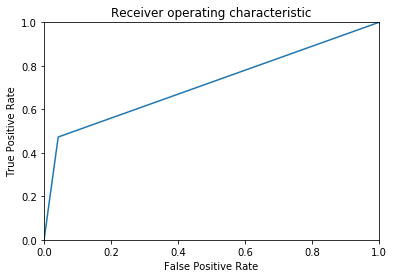

In [0]:
fpr,tpr, thresholds = metrics.roc_curve(Y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [0]:
# Calculate AUC
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve',roc_auc)

Area Under the curve 0.7152780413740747
